# Giving a quick overview over the instances in the benchmark and their distribution

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from puzzle_tour_solver.utils.plot_utils import PolygonPatch
import random as rd
from shapely import affinity
from shapely.geometry import Polygon

In [8]:
results = pd.read_json("./03_clean_data.json.zip")
import shapely.wkt

results["polygon"] = results["polygon"].apply(lambda p: shapely.wkt.loads(p))

Text(0, 0, 'Orthogonal Polygons')
Text(0, 0, 'Octagonal Polygons')
Text(0, 0, 'Polyominoes')


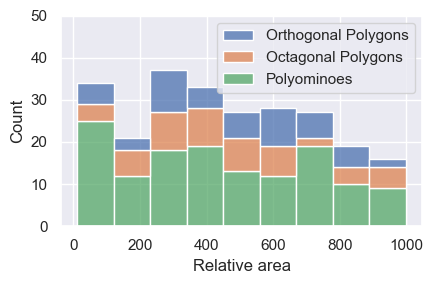

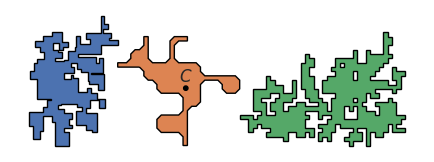

In [10]:
fig1, ax1 = plt.subplots()
fig1.set_figwidth(4.5)
fig1.set_figheight(3)

fig2, ax2 = plt.subplots()
fig2.set_figwidth(4.5)
fig2.set_figheight(3)
rd.seed(81)
#rd.seed(4)
sns.set_theme()
sns.histplot(results, x="relative_area", hue="instance_type_simplified", ax=ax1, multiple="stack")
ax1.set_ylim(None, 50)
ax1.set_xlabel("Relative area")
ax1.set_ylabel("Count")

x_start_last = 0
for i, polygon in enumerate(
        rd.choice(list(results[results["instance_type"] == instance_type]["polygon"])) for instance_type in
        ['srpg_iso', 'srpg_octa', 'gen_aligned']):

    if i != 1: polygon = affinity.rotate(polygon, 90)  #type: Polygon

    xmin, ymin, xmax, ymax = polygon.bounds

    # Translate to origin
    translate_x = -xmin
    translate_y = -ymin

    if i == 0:
        translate_x -= xmax-xmin
        #translate_y -= 20
    elif i==1:
        x_start_last = xmax-xmin
    else:
        translate_x += x_start_last
        #translate_y -= 20

    polygon = affinity.translate(polygon, translate_x, translate_y)  #type: Polygon

    ax2.add_patch(PolygonPatch(polygon.buffer(0), fc=sns.color_palette()[i], ec="black"))

    if i == 1:
        ax2.add_patch(plt.Circle((polygon.centroid.x+2, polygon.centroid.y-1), 0.5, color='black'))
        ax2.text(polygon.centroid.x+2, polygon.centroid.y, "$C$", ha="center", va="bottom")

ax2.autoscale_view()
ax2.set_aspect('equal')
ax2.axis('off')

leg = ax1.get_legend()
leg.set_title(None)
for t in leg.get_texts():
    print(t)
    if t.get_text() == 'instance_type_simplified':
        t.set_text("Type")
fig1.tight_layout()
fig1.savefig("out/07_instance_distribution.pdf")

fig2.tight_layout()
fig2.savefig("out/07_instance.pdf")

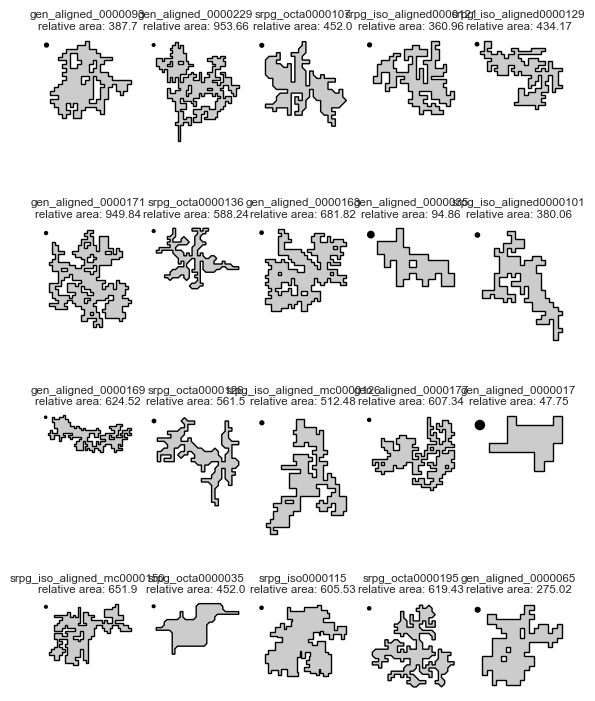

In [19]:
import random as rd
from puzzle_tour_solver.utils.plot_utils import PolygonPatch

sns.set(font_scale=.6)
nrows = 4
ncols = 5
rd.seed(31415)
all_polygons = [row for _, row in results.iterrows()]
rows_to_visualize = rd.sample(all_polygons, nrows * ncols)

fig, axs = plt.subplots(ncols=ncols, nrows=nrows)

fig.set_figheight(8)
fig.set_figwidth(5.51)

for ax, row in zip(axs.flat, rows_to_visualize):
    polygon = row["polygon"]
    xmin, _, _, ymax = polygon.bounds
    ax.add_patch(PolygonPatch(polygon.buffer(0), fc="#cccccc", ec="#000"))
    ax.add_patch(plt.Circle((xmin-1, ymax-1), 0.5, color='#000000'))
    ax.autoscale_view()
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f"{row['instance'].rstrip('.poly')}\nrelative area: {round(row['relative_area'], 2)}")
    ax.set_anchor('N')

fig.tight_layout()
fig.savefig("out/07_instance_examples.pdf")